<a href="https://colab.research.google.com/github/BDouchet/SDATA/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 



*   numpy
*   matplotlib.pyplot
*   math



In [198]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Ex 1

$X$, a random variable where $X ∈ {0, 1}$ such as :

$P(X = 0) = p ∈ [0, 1]$,

for an arbitrary constant $p$. 

The aim is to simulate $X$ and find $p$ with <u>Monte-Carlo's methods</u>.

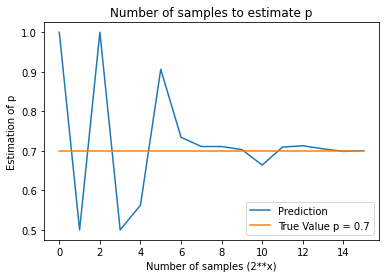

In [201]:
np.random.seed(0)

p=0.7

#The simulation of X follows a Bernoulli distribution
def bernoulli():
    if np.random.rand()<p:
        return 0
    return 1

# Try to find the value of p with Monte-Carlo's methods
def find_p(n):
    zero_one=[0,0]
    for _ in range(n):
        zero_one[bernoulli()]+=1
    return zero_one[0]/(zero_one[0]+zero_one[1])


X=np.arange(16)
Y=np.array([find_p(2**x) for x in X])
plt.plot(X,Y,label='Prediction')
plt.title("Number of samples to estimate p")
plt.xlabel("Number of samples (2**x)")
plt.ylabel("Estimation of p")
plt.plot(X,np.array([p for _ in X]),label='True Value p = '+str(p))
plt.legend(loc='lower right')
plt.show()


# Exo 2

Same with Poisson distribution. $X$ a random distribution such as $X$ ~ $Pois(λ)$ with $λ > 0$.

$P (X = k) = e^{−λ} \frac{λ^k}{k!}, ∀k ∈ N$

Th idea is to estimate the estimate the expected value and the variance of $X$ : $E(X)$ and $Var(X)$. 


In [202]:
np.random.seed(0)
lbd=5

# Poisson Distribution
def poisson(k):
    return math.exp(-lbd)*(lbd**k)/math.factorial(k)


To estimate $E(X)$ and $Var(X)$, I first calculate the cumulated probabilities of the distributions. It looks like this :

[0.44049329 0.61596065]


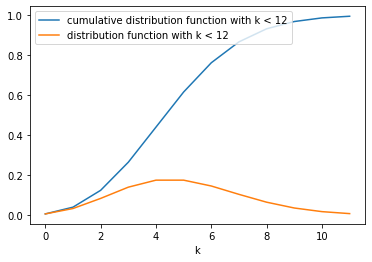

In [210]:
n=12
probs=[poisson(k) for k in range(n)]
probs_cumul=np.cumsum(np.array(probs))

plt.plot(probs_cumul,label='cumulative distribution function with k < 12')
plt.plot(probs,label='distribution function with k < 12')
plt.legend(loc='upper left')
plt.xlabel("k")
plt.show()

I simulate the distribution with an uniform distribution. According to the output probability, I get the corresponding $k$ from the Poisson distribution :

$ \sum_{i=0}^{k-1} P(X=i) < p < \sum_{i=0}^{k} P(X=i) $

For instance, in the following example, $k = 5$.

In [215]:
np.random.seed(0)
print(np.random.rand())
print(probs_cumul[:6])

0.5488135039273248
[0.00673795 0.04042768 0.12465202 0.26502592 0.44049329 0.61596065]


Once I simulate the Poisson Distribution, I calculate $E(X)$ and $Var(X)$. Because it is a Poisson Distribution, $E(X) = Var(X) = λ$. With $E(X) = \frac{1}{N} \sum_{i=0}^\infty X_{i}*i $ and $Var(X) = \frac{1}{N} \sum_{i=0}^\infty (X_{i}*i - E(X))$.

In [218]:
def estimator(n,N):
    probs=[poisson(k) for k in range(n)]
    probs_cumul=np.cumsum(np.array(probs))
    distrib=np.zeros(n+1)
    for _ in range(N):
        distrib[np.searchsorted(probs_cumul,np.random.rand())]+=1
    expected=np.sum([distrib[i]*i for i in range(n+1)])/N
    var=np.sum([distrib[i]*i-expected for i in range(n+1)])/N
    return expected,var,distrib

estimator(15,10000)

(5.0014,
 4.99339776,
 array([  85.,  330.,  859., 1367., 1718., 1803., 1444., 1064.,  667.,
         335.,  185.,   92.,   28.,    8.,   12.,    3.]))

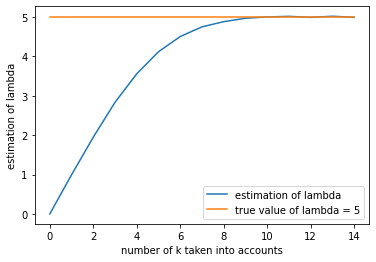

In [213]:
N=10000

X=np.arange(lbd*3)
Y=np.array([estimator(x,N)[0] for x in X])
plt.plot(X,Y,label='estimation of lambda')
plt.plot(X,[lbd for _ in X],label='true value of lambda = '+str(lbd))
plt.legend(loc='lower right')
plt.xlabel('number of k taken into accounts')
plt.ylabel('estimation of lambda')
plt.show()

pi ~ 3.1422


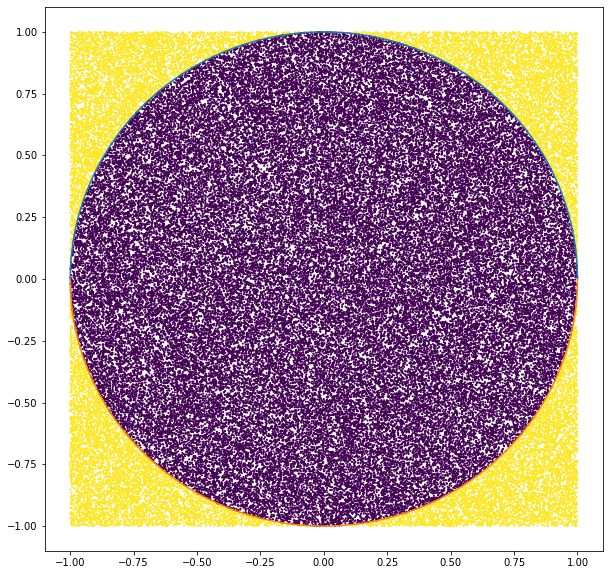

In [134]:
np.random.seed(0)

N=100000

def f(x):
    return math.sqrt(1-x**2)

in_out=[0,0]
X,Y,Z=[],[],[]

for _ in range(N):
    x=np.random.rand()*2-1
    y=np.random.rand()*2-1

    X.append(x)
    Y.append(y)

    if f(x)>y and -f(x)<y:
        in_out[0]+=1
        Z.append(0)
    else:
        in_out[1]+=1
        Z.append(1)

print('pi ~ '+str(in_out[0]*4/N))

abs=np.linspace(-1,1,1000)

plt.figure(figsize=(10,10))
plt.scatter(X,Y,c=Z,s=1)
plt.plot(abs,[f(x) for x in abs])
plt.plot(abs,[-f(x) for x in abs])
plt.show()



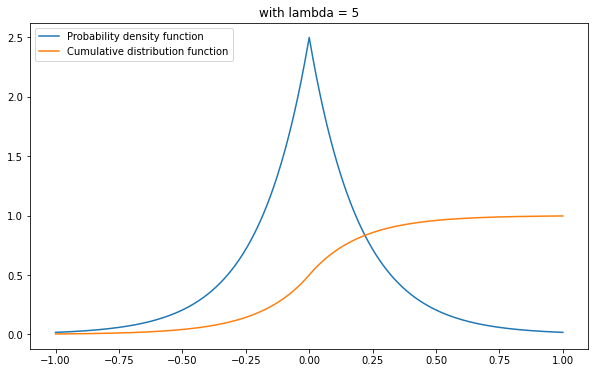

In [189]:
X=np.linspace(-1,1,10000)

def f(lbd,x):
    return lbd/2*math.exp(-lbd*np.abs(x))

def F(lbd,t):
    if t<=0:
        return math.exp(lbd*t)*0.5
    else:
        return 0.5*(1-math.exp(-lbd*t))+0.5

plt.figure(figsize=(10,6))
plt.title("with lambda = 5")
plt.plot(X,np.array([f(5,x) for x in X]),label='Probability density function')
plt.plot(X,np.array([F(5,x) for x in X]),label='Cumulative distribution function')
plt.legend(loc='upper left')
plt.show()

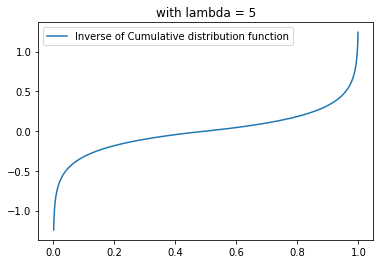

In [196]:
X=np.linspace(0,1,1000,endpoint=False)[1:]

def F_inv(lbd,y):
    if y<=0.5:
        return math.log(2*y)/lbd
    else:
        return -math.log(2*(1-y))/lbd

plt.title("with lambda = 5")
plt.plot(X,np.array([F_inv(5,x) for x in X]),label='Inverse of Cumulative distribution function')
plt.legend(loc='upper left')
plt.show()